# IDEAS

### Inspiring Kernels
* https://www.kaggle.com/harvinderwazir/match-outcome-prediction-in-football

* https://www.kaggle.com/stvrdo/goals-ratings-simulations/notebook

* https://www.kaggle.com/petehodge/epl-weekly-predicting/notebook
    
### VISUALIZATIONS - MUY IMPORTANTE
[Seventeen Ways to Map Data in Kaggle kernels](http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/) 


## Background


# TYPE FROM PROPOSAL


# Data Preprocessing

### Type of data

The dataset is available at https://www.kaggle.com/hugomathien/soccer/data. The data is in the form of a sqlite database. 

### About the data

The data contains the following tables:

*** Country, League, Match, Player, Player_Attributes, Team, Team_Attributes***

The tables *country, league, player and team* are lookup tables. Lets focus on the table with attributes - Player_Attributes, Team_Attributes and Match.
In the following code cell, I read the SQLITE table and display the first record of all these three tables.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import data_preprocess as dp
# Import supplementary visualization code visuals.py, renamed as visuals_udacity.py. I have taken this code from the Udacity
# machine learning projects
from Utils import *

# Pretty display for notebooks
%matplotlib inline
conn = dp.uncompress_and_open_sqlite()
print ("Players")
players_df = dp.sql_to_dataframe(conn, select_all_query_table("Player_Attributes"))
display(players_df.head(n=1))
print ("Teams")
teams_df = dp.sql_to_dataframe(conn, select_all_query_table("Team_Attributes"))
display(teams_df.head(n=1))
print ("Matches")
match_df = dp.sql_to_dataframe(conn, select_all_query_table("Match"))
display(match_df.head(n=1))

Players


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


Teams


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


Matches


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


### Defining the data features and labels
* Players : 

In [12]:
players_skills = players_df[['player_api_id', 'finishing', 'sliding_tackle', 'gk_reflexes', 'short_passing', 'date']]
players_ratings_label = players_df[['player_api_id','date', 'overall_rating']]
players_features_df = players_df.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential'], axis=1)
display(players_features_df.head(n=1))

,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


* Teams
No output label. I'll drop the metadata to get features.

In [13]:
teams_features_df = teams_df.drop(['id', 'team_fifa_api_id', 'team_api_id', 'date'], axis=1)
display(teams_features_df.head(n=1))

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


# Pick either of these two

* Clustering players on skills: I have put a naive method for classifying players into midfield, attack, defense and goalkeeper. I want to see if clustering can segment players into such clear-cut segments. 

### USE CASE: A young player, who does not what is his calling; I will help him...


* Clustering matches based on excitement - This is an unsupervised learning problem, and excitement is kind of hard to describe. I will consider excitement in terms of the number of goals, red cards, incidents etc. See later section for implementation.


### Generating output labels

The matches have the goals score information (by home and away) teams; however don't have a label. I am generating a label, based on the goals scored.

#### Get match results
In the following code cell, I apply a lambda function to get the result label as either ['Home Win', 'Away Win', 'Draw']. Then, following what was done in *Charity ML*, I one hot-encode the result label into a vector. Five samples of each of the two steps is shown.

#### Get bookkepper odds

In [14]:
import matches as matches
reload(matches)
match_df['result_label'] = match_df.apply(matches.result, axis = 1)
display(match_df[['home_team_goal', 'away_team_goal', 'result_label']].sample(n=5))

one_hot_match_result_labels = pd.get_dummies(match_df['result_label'])
display(one_hot_match_result_labels.sample(n=5))

,home_team_goal,away_team_goal,result_label
25414,1,1,DRAW
15460,2,3,AWAY_WIN
9924,0,1,AWAY_WIN
4834,0,1,AWAY_WIN
23876,0,1,AWAY_WIN


,AWAY_WIN,DRAW,HOME_WIN
19027,0,0,1
21247,0,0,1
5168,0,0,1
9142,0,0,1
11706,0,1,0


### Defining the base classifier: The home advantage
Now that we have our labels defined, let us define the **baseline classifier**.
Home advantage is real, as mentioned in the Kaggle link, as well as here: http://bleacherreport.com/articles/1604854-how-much-does-home-field-advantage-matter-in-soccer. Lets analyze the home advantage across different leagues.

In [15]:
import data_preprocess as dp
reload(dp)
home_advantage_per_country = dp.home_advantage(matches_df=match_df, conn=conn)
display(home_advantage_per_country)
total_num_matches = match_df.shape[0]
total_home_wins = match_df[match_df['result_label'] == 'HOME_WIN'].shape[0]
total_away_wins = match_df[match_df['result_label'] == 'AWAY_WIN'].shape[0]
print ("Home Wins occur about " + str(np.around(np.true_divide(total_home_wins, total_num_matches), decimals = 2)) + " % of the time")
print ("Away Wins occur about " + str(np.around(np.true_divide(total_away_wins, total_num_matches), decimals = 2)) + " % of the time")

,name,percentage_home_win
0,Belgium,46.875000
1,England,45.723684
2,France,44.703947
3,Germany,45.220588
4,Italy,46.635731
5,Netherlands,47.834967
6,Poland,45.312500
7,Portugal,44.249513
8,Scotland,41.666667
9,Spain,48.848684


Home Wins occur about 0.46 % of the time
Away Wins occur about 0.29 % of the time


#### Observations:
Home advantage is indeed real; and consistent across all countries. ALWAYS predicting a home win would result us in being correct 46% of the time; and therefore our **baseline accuracy with a naive model is 46%.**
I would like to use this to some effect while engineering features. I believe such stats might help:
* Home team's track record playing at home
* Away team's track record playing away 
* Away team's track record playing at the location the current match is at

More on this in the section on features.

#### Visualizing player ratings
A histogram visualization to view player distributions in terms of ratings will be helpful. I will be using this to gain intution for features such as 'players_in_top_X_percent'. Sometimes a single ***star player*** can win a match for their team; and that is my intuition behind these features.

(63.5, 73.667]      0.530580
(73.667, 83.833]    0.230843
(53.333, 63.5]      0.197029
(43.167, 53.333]    0.022057
(83.833, 94.0]      0.013904
(32.938, 43.167]    0.001044
Name: overall_rating, dtype: float64

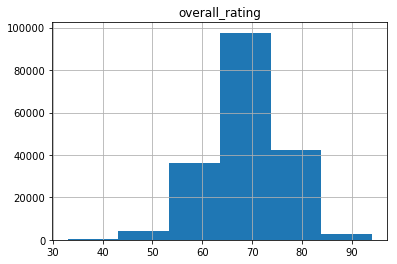

In [16]:
import matplotlib.pyplot as plt
# Visualize player ratings
players_df.hist(column= 'overall_rating', bins = 6)
players_df['overall_rating'].value_counts(bins = 6, normalize=True)

#### Defining the problems

* The holy grail is predicting the outcome of a football match, as mentioned in the kaggle link for the dataset I intend to use 

* Cluster matches based on the excitement level and interest in the game; possibly use this to model ticket prices. I would guess that a match between Real Madrid and Barcelona would be the most expensive. What factors make fans pay more for a match? If I follow a certain team, how much money can I expect to shell out?

* Model players and teams; and assign them a quantifiable number that serves as a rating of skill. I would like to find the answer to the pull of star power; many people tune in to football matches to watch Messi, Neymar or Ronaldo. Note that the capability of players also affects the excitement surrounding football matches.

* The main service they provided is advice to teams on whether or not a player should be bought or sold, not sure if this would be of any help, one of they key concepts they discussed was coming up with a metric on players on how much of an impact the player makes which was calculated by figuring out a team's performance with and without that particular player while taking into account other players and different circumstances.
**Background**
Players get injured all the time, with managers complaning about injuries (insert link). Through this part of the code, I wish to answer this queation: ***How does the team fare if player X is out due to injury for T% of the season?***. For eg. : How does Barcelona do in season 2011-12, had Messi not been there?

### Handling Bad Data

The Kaggle page does say that some input values are missing, and indeed it does. In this code block, I wish to eliminate some of the data where features I think are relevant (more discussion on this in the section on Feature generation). The columns are defined in the Utils.py file in the code. For now, I will be focusing on the match dataframe.

For this I use the *dropna* method in pandas. I certainly do not want to blindly check for validity of all columns in the match; a lot of it is information I don't think is necessary for prediction (bettting data, corners for example); atleast for the problem of determining match results.

Therefore I define the columns IMPORTANT to me, in the aptly named variable.
Luckily, even if I drop the data if ***any*** of the player ratings is absent, I do not lose a lot of data; as shown in the example below.

### TODO: Different processing for the match excitement clustering problem

In [17]:
import Utils as Utils
reload(Utils)
IMPORTANT_COLUMNS = Utils.AWAY_PLAYER_COLUMNS + Utils.HOME_PLAYER_COLUMNS
print ("Number of samples before removing cases of no data: " + str(match_df.shape[0]))
match_clean_data_df = match_df.dropna(axis = 0, how = 'any', subset = IMPORTANT_COLUMNS)
print ("Number of samples after removing cases of no data: " + str(match_clean_data_df.shape[0]))

Number of samples before removing cases of no data: 25979
Number of samples after removing cases of no data: 21374


# Feature Selection

In this section, I generate some features from the given match data, that I think are relevant from my domain knowledge of football.

## TODO: WRITE ABOUT HOW YOU LEARNT ABOUT LAMBDA AND PARTIAL HERE.

### Utility APIs for features
The following code blocks demonstrates the use of some util methods I have in my code, to help get some features from the raw data for the task of match prediction. 

#### Acknowledgement: Thanks to the author of https://www.kaggle.com/harvinderwazir/match-outcome-prediction-in-football/notebook ; for neatly putting up the relevant column names for a particular task! :)

#### Classify a player into midfield, attack and defense
Takes in as an input the relevant player skills and classifies into midfielder, attacker, defender or goalkeeper; based on the most recent numbers from the database. Here I validate my method against the famous players (3 of each of the 4 types) who I know i can classify into the aforementioned categories.
As can be seem from the results (and if you know your football :), my method takes a good decision from the columns of interest. The reason I wish to make this distinction is to better divide a team's rating based on players into defense, attack and midfield; rather than an overall average rating. I will be using this more further in the section on Features and Classification.

In [18]:
import players as players
reload(players)
player_names_df = dp.sql_to_dataframe(conn, select_all_query_table("Player"))
FAMOUS_PLAYER_NAMES = ['Lionel Messi', 'Cristiano Ronaldo', 'Didier Drogba', 'John Terry', 
                'Rio Ferdinand', 'Gerard Pique', 'Petr Cech', 'Iker Casillas', 
                'Joe Hart', 'Frank Lampard', 'Xavi Hernandez', 'Andres Iniesta']
COLUMNS_OF_INTEREST = ['player_name', 'finishing', 'sliding_tackle',
                     'gk_reflexes', 'short_passing']
for player in FAMOUS_PLAYER_NAMES:
    display(players.player_to_player_type(players_skills=players_skills, player_names_df=player_names_df, 
                                      player_name=player, COLUMNS_OF_INTEREST=COLUMNS_OF_INTEREST))

,player_name,player_type,player_api_id
102482,Lionel Messi,Attacker,30981


,player_name,player_type,player_api_id
33330,Cristiano Ronaldo,Attacker,30893


,player_name,player_type,player_api_id
43418,Didier Drogba,Attacker,30822


,player_name,player_type,player_api_id
84848,John Terry,Defender,30627


,player_name,player_type,player_api_id
149835,Rio Ferdinand,Defender,30620


,player_name,player_type,player_api_id
62977,Gerard Pique,Defender,37482


,player_name,player_type,player_api_id
142868,Petr Cech,Goalkeeper,30859


,player_name,player_type,player_api_id
72590,Iker Casillas,Goalkeeper,30657


,player_name,player_type,player_api_id
83352,Joe Hart,Goalkeeper,31432


,player_name,player_type,player_api_id
59244,Frank Lampard,Midfielder,30631


,player_name,player_type,player_api_id
180709,Xavi Hernandez,Midfielder,39854


,player_name,player_type,player_api_id
12773,Andres Iniesta,Midfielder,30955


I will now run this on all players and create a lookup dictionary to look up player type by player ID; this will speed up the later process of aggregating team ratings by type. *Note that the assumption here is that a player does not change his type on the field, therefore we just use the latest value for his skills to determine his type.*

In [ ]:
unique_player_list = set(players_skills['player_api_id'].tolist())
player_to_player_type_dict=dict()
import Utils as Utils
reload(Utils)
import json

# TODO: Move SKILL COLUMNS to Utils.py
player_num = 0
for player_api_id in unique_player_list:
    player_num = player_num + 1
    if player_num % 1000 == 0:
        print ("Done with " + str(player_num) + " players")
    player_to_player_type_dict[player_api_id] = players.player_api_id_to_player_type(players_skills=players_skills, 
                                                               COLUMNS_OF_INTEREST=Utils.SKILL_COLUMNS,
                                                               player_api_id=player_api_id)
with open('Data_Structures/player_to_player_type.json', 'w+') as outfile:
     json.dump(player_to_player_type_dict, outfile, indent = 4,
               ensure_ascii = False)
print "Done creating the dictionary and wrote to file"

Done with 1000 players
Done with 2000 players
Done with 3000 players
Done with 4000 players
Done with 5000 players
Done with 6000 players
Done with 7000 players
Done with 8000 players
Done with 9000 players
Done with 10000 players
Done with 11000 players
Done creating the dictionary and wrote to file


#### Get Average Player Ratings For Match
Takes as an input a match, and returns back the ratings in the form of [midfielder_rating, attacker_rating, defender_rating, goalie_rating] for both the teams. Note that the ratings are based on the first ratings back in time I can find from that season; this is because every player has multiple ratings spread across time. For eg. for 2012-13, I will look for the date closest to Dec 31 2012 and take the player's ratings for that date.

Sometimes, I observed a team has no attacking players (rare, but not impossible); a team might decide to just play defenders and midfielders. In that case, I assign the attacking rating as 0.

#### Team rating without player
Removes a particular player under consideration, and then randomly chooses any of the other 10 to replace him. Across a season or some amount of matches, this is to mimic how a team performs if a particular player is out injured for the season, or his impact on the team if he were to leave the team.

Demonstrating the use of both APIs in the code cell below.

In [ ]:
import matches as matches
reload(matches)
import players as players
reload(players)
from functools import partial
import json
import Utils as Utils
reload(Utils)
with open('Data_Structures/player_to_player_type.json') as data_file:    
    player_to_player_type_dict = json.load(data_file)   
player_types= Utils.PLAYER_TYPES
# Just for generating features..

player_types= ['Midfielder']
team_types=['away', 'home']
display(match_clean_data_df.head(n=1))

# USE THIS TO COMBINE: https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns --> #USE SUFFIXES
FEATURE_COLUMNS = []
for player_type_input in player_types:
    for team_type in team_types:
        FEATURE = team_type + "_" + player_type_input + "_rating"
        FEATURE_COLUMNS.append(FEATURE)
        print ("Evaulating feature " + FEATURE)
        get_feature = partial(matches.single_match_rating,players_ratings_label=players_ratings_label, 
                             player_to_player_type_dict=player_to_player_type_dict, 
                              player_type_input=player_type_input, team_type=team_type)
        match_clean_data_df[FEATURE] = match_clean_data_df.apply(get_feature, axis = 1)

        COLUMNS_TO_SAVE = ['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date', 'result_label'] + FEATURE_COLUMNS
        display(match_clean_data_df[COLUMNS_TO_SAVE].head(n=10))
        match_clean_data_df[COLUMNS_TO_SAVE].to_csv("match_features_so_far_3.csv")

### Form Number stats features generation
### Here are the features I generated from the raw data, based on my intuition.

- HOME TEAM ALL TIME HOME RECORD AND RECORD THIS SEASON THUS FAR
- AWAY TEAM AWAY RECORD - ALL TIME AND THIS SEASON THUS FAR
- AWAY TEAM AWAY RECORD AT THIS GROUND- ALL TIME
- TEAMS HEAD TO HEAD

# TODO: 
- TEAM FORM GUIDE - last 5 matches,  DEFINE IT AS A STRING; and ENCODE TO CATEGORIAL VALUE - CATEGORIAL LABELS

Order - the last match is at the front of the string; therefore if in this season, a team lost its last 2 matches and the won the three before those, form guide will be LLWWW.

### Note that the code below is an example of how to use the APIs, I rant this code from the main of my function to generate these features.

In [ ]:
from form_stats import *
all_features_df = pd.read_csv('Data_Structures/MATCH_FEATURES.csv')
FORM_STATS_FEATURES = ['match_api_id', 'home_team_api_id', 'away_team_api_id',
                   'season', 'date', 'result_label']
all_features_df['date'] = pd.to_datetime(all_features_df['date'])

match_sample = all_features_df

print "Getting head to head home win rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Home Win")
match_sample['HEAD_2_HEAD_HOME_TEAM_WINS'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting head to head home loss rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Home Loss")
match_sample['HEAD_2_HEAD_HOME_TEAM_LOSS'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting head to head draw rate"
get_head_to_head = partial(head_to_head, full_df=all_features_df, value = "Draw")
match_sample['HEAD_2_HEAD_DRAW'] = match_sample.apply(get_head_to_head, axis = 1)

print "Getting home win rate all time"
get_home_win_rate = partial(home_team_all_time_home_record, full_df=all_features_df)
match_sample['HOME_WIN_RATE'] = match_sample.apply(get_home_win_rate, axis = 1)

print "Getting home win rate this season"
get_home_win_rate_this_season = partial(home_team_this_season_home_record, full_df=all_features_df)
match_sample['HOME_WIN_RATE_THIS_SEASON'] = match_sample.apply(get_home_win_rate_this_season, axis = 1)

print "Getting away win rate all time"
get_away_win_rate = partial(away_team_all_time_away_record, full_df=all_features_df)
match_sample['AWAY_WIN_RATE'] = match_sample.apply(get_away_win_rate, axis = 1)

print "Getting away win rate this season"
get_away_win_rate_this_season = partial(away_team_this_season_away_record, full_df=all_features_df)
match_sample['AWAY_WIN_RATE_THIS_SEASON'] = match_sample.apply(get_away_win_rate_this_season, axis = 1)

print "Getting away team's win rate AT THIS GROUND"
get_away_win_rate_at_this_ground = partial(away_team_all_time_away_record_at_this_ground, full_df=all_features_df)
match_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_sample.apply(get_away_win_rate_at_this_ground, axis = 1)


match_sample.to_csv('Data_Structures/form_numbers.csv')

### Top and bottom tier players

Why do we need it? Often matches are won by a *brilliant player's moment of genius*; or a *bad player's mistake*. TODO: WRITE MORE WHY WE NEED THIS?

#### Top 1% of the players 
Based on the histogram above, I will define a top player to be a player with overall_rating > 80.

#### Bottom 1% of the players - analyze player distribution with histogram.
Based on the histogram above, I will define a bottom player to be a player with overall_rating < 50.

In [19]:
import matches as matches
reload(matches)
from functools import partial

match_sample_df = match_clean_data_df

get_top_players_home = partial(matches.top_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='home', TOP_PLAYER_THRESHOLD = 80)
match_sample_df['num_top_players_home'] = match_sample_df.apply(get_top_players_home, axis = 1)

get_top_players_away = partial(matches.top_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='away', TOP_PLAYER_THRESHOLD = 80)
match_sample_df['num_top_players_away'] = match_sample_df.apply(get_top_players_away, axis = 1)

get_bottom_players_home = partial(matches.bottom_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='home', BOTTOM_PLAYER_THRESHOLD = 50)
match_sample_df['num_bottom_players_home'] = match_sample_df.apply(get_bottom_players_home, axis = 1)

get_bottom_players_away = partial(matches.bottom_players_in_team, players_ratings_label=players_ratings_label, 
                               team_type='away', BOTTOM_PLAYER_THRESHOLD = 50)
match_sample_df['num_bottom_players_away'] = match_sample_df.apply(get_bottom_players_away, axis = 1)



COLUMNS_TO_SAVE = ['match_api_id', 'num_top_players_home', 'num_top_players_away','num_bottom_players_home','num_bottom_players_away']
display(match_sample_df[COLUMNS_TO_SAVE])

match_sample_df[COLUMNS_TO_SAVE].to_csv('num_player_stats.csv')

Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


/Users/sa.goyal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


/Users/sa.goyal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


/Users/sa.goyal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Done with 1000samples
Done with 2000samples
Done with 3000samples
Done with 4000samples
Done with 5000samples
Done with 6000samples
Done with 7000samples
Done with 8000samples
Done with 9000samples
Done with 10000samples
Done with 11000samples
Done with 12000samples
Done with 13000samples
Done with 14000samples
Done with 15000samples
Done with 18000samples
Done with 19000samples
Done with 20000samples
Done with 21000samples
Done with 22000samples
Done with 23000samples
Done with 24000samples
Done with 25000samples


/Users/sa.goyal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,match_api_id,num_top_players_home,num_top_players_away,num_bottom_players_home,num_bottom_players_away
145,493017,0,0,0,0
153,493025,0,0,0,0
155,493027,0,0,0,0
162,493034,0,0,0,0
168,493040,0,0,0,0
173,493045,0,0,0,0
176,493048,0,0,0,0
189,493061,0,0,0,0
190,493062,0,0,0,0
217,493080,0,0,0,0


### Some notes about the feature process

* **Learning pandas, lambdas and partial** - generating my intuition to features, required the use of knowing these.

* Saving and re-working. I learnt it this the hard way; saving feature generation into apt csv files is VERY IMPORTANT, from time to time.

# TODO: ANALYZE THE TOP PLAYER THING! SEEMS TOO HARSH, USE AS BOOLEAN MAYBE?

### Plotting some observations from the stats features
Now that we have our features (phew!), lets see if we can see something. For example, here is FC Barcelona's home record with respect to time. For ease, I am getting a dictionary that maps name to team_api_id first; and then using the team_api_id to get the stats.

## TODO: 
### Notes about the datatypes of the features GO HERE
### Analyze number of top players for the top teams

,match_api_id,num_top_players_home,num_top_players_away,num_bottom_players_home,num_bottom_players_away,home_team_api_id,away_team_api_id,season,date,result_label,...,HEAD_2_HEAD_HOME_TEAM_WINS,HEAD_2_HEAD_HOME_TEAM_LOSS,HEAD_2_HEAD_DRAW,HOME_WIN_RATE,HOME_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE,AWAY_WIN_RATE_THIS_SEASON,AWAY_WIN_RATE_AT_THIS_GROUND,HOME_TEAM_FORM_GUIDE,AWAY_TEAM_FORM_GUIDE
16074,643181,0,0,0,0,8429,9927,2008/2009,5/16/09,AWAY_WIN,...,0.500000,0.500000,0.000000,0.384615,0.384615,0.285714,0.285714,0.00,LDWDL,DWLDD
12060,2060536,0,0,0,0,9876,9891,2015/2016,4/17/16,AWAY_WIN,...,0.000000,1.000000,0.000000,0.360000,0.142857,0.071429,0.071429,NaN,LWDLL,LLDLW
11307,1536777,0,0,0,0,7943,10167,2013/2014,3/2/14,AWAY_WIN,...,0.000000,1.000000,0.000000,0.250000,0.250000,0.246914,0.400000,NaN,LLLLL,DWDWW
2638,1024510,0,1,0,0,8659,9879,2011/2012,9/24/11,DRAW,...,1.000000,0.000000,0.000000,0.342857,0.000000,0.118644,0.000000,0.00,LWLLL,DDLLD
8821,1732803,0,0,0,0,8722,8358,2014/2015,11/2/14,AWAY_WIN,...,0.333333,0.333333,0.333333,0.328571,0.250000,0.244444,0.000000,0.00,WWLLL,LLDDD
16900,1474240,0,0,0,0,8597,8649,2013/2014,10/19/13,HOME_WIN,...,0.666667,0.000000,0.333333,0.280488,0.000000,0.250000,0.000000,0.00,LLDLD,WWLWL
8972,1732951,0,1,0,0,10269,9810,2014/2015,3/21/15,HOME_WIN,...,0.600000,0.200000,0.200000,0.414414,0.083333,0.232558,0.166667,0.25,LDDLL,WLWLW
1473,489379,0,0,0,0,9879,10194,2008/2009,4/25/09,HOME_WIN,...,0.000000,0.000000,1.000000,0.571429,0.571429,0.062500,0.062500,NaN,DWLWW,WDWWL
16910,1474258,0,0,0,0,9925,9938,2013/2014,11/2/13,DRAW,...,0.684211,0.052632,0.263158,0.770115,0.666667,0.341176,0.250000,0.00,WDWWW,WLWDW
15579,1750677,0,1,0,0,9773,9768,2014/2015,3/1/15,HOME_WIN,...,0.416667,0.166667,0.416667,0.859155,0.857143,0.383562,0.555556,0.00,WLWWL,WDDWW


(array([ 733773.,  734138.,  734503.,  734869.,  735234.,  735599.,  735964.]),
 <a list of 7 Text xticklabel objects>)

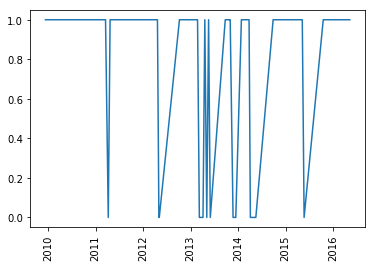

In [129]:
import data_preprocess as dp
reload(dp)
import pandas as pd
match_features_all_df = pd.read_csv('Data_Structures/ALL_MATCH_FEATURES.csv')
display(match_features_all_df.sample(n=10))

team_df = sql_to_dataframe(conn, select_all_query_table("Team"))
team_name_to_id_dict = dp.get_team_name_to_team_api_id_dict(team_df)
CLUB = 'FC Barcelona'
barca_api_id = (int(team_name_to_id_dict[CLUB]))


# Factor this out into a function.
barca_top_players_num = match_features_all_df[match_features_all_df['home_team_api_id'] == barca_api_id]

barca_home_win_df.date = pd.to_datetime(barca_home_win_df.date)
barca_home_win_df = barca_home_win_df.sort_values('date', ascending=True)
barca_home_win_df=barca_home_win_df.dropna(how='any')
plt.plot(barca_home_win_df['date'], barca_home_win_df['num_top_players_home'])
plt.xticks(rotation='vertical')


### Filling the NaN values
* **The NaN case**- As shown in the feature definitions below, what if we don't have the history to get those stats? For eg. if this is the first team these teams are meeting (as per our data); we cannot say what the home to home stats are. Similary for form guide, I need *atleast five matches* to get a good estimate. When such history was not avaialble, I replaced the value with np.nan. Now to fill these NaN Valyes up, I could use the [Imputer method](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) given by scikit, however decided to just implement my own logic. The reason is that I want to have some logic in replacing the NaN values, for example:

    - For a team's home record that season, I will take the mean of the other values for the season. Note that only the first entry will be missing in this case for a team (the first home game of the season).
    - For head to head, I will replace np.na with the most common form guide for that team that season.
    
# TODO: Elaborate more on your fill nan strategies..

* HEAD_2_HEAD_HOME_TEAM_WINS, HEAD_2_HEAD_HOME_TEAM_LOSS, HEAD_2_HEAD_DRAW : Take all head to head matches, and replace np.nan with the mean of all non nan values. It is possible that some teams have NEVER played before, in which case I will just randomly assign a value of 0.33 to each of the three events (equal probability of happening).

* AWAY_WIN_RATE_AT_THIS_GROUND : Find all samples where this team played away at this home team's ground; and take average. If this team has never played here; just take the average of its all time away record. Note that this is rare, but possible. If this team has never played away other than this ins
##### Of course I could throw out this data that is na for my features, but the idea of throwing out data broke my heart...

## NOTE: I VALIDATE NO NaNs are left, using 'isnull.values.any' after each column

## Here is the list of all possibilities for form guide. If there is a nan, and there is no other data for that team, I will randomly replace with one of the 243 possibilities. (3 options for 5 matches, 3^5)

In [130]:
import itertools
all_possibilities_form_guide = list(itertools.product(['L', 'W', 'D'], repeat=5))
all_possibilities_form_guide_string_list = list()
for possibility in all_possibilities_form_guide:
    all_possibilities_form_guide_string_list.append(''.join(possibility))
#print all_possibilities_form_guide_string_list
assert len(all_possibilities_form_guide_string_list) == 243

In [ ]:
from functools import partial
#match_features_sample = match_features_all_df[match_features_all_df['match_api_id']==493017]
match_features_sample = match_features_all_df
COLUMNS_TO_NAN_FILL= ['HEAD_2_HEAD_HOME_TEAM_WINS', 'HEAD_2_HEAD_HOME_TEAM_LOSS', 'HEAD_2_HEAD_DRAW', 'HOME_WIN_RATE',
                     'AWAY_WIN_RATE', 'AWAY_WIN_RATE_AT_THIS_GROUND', 'AWAY_WIN_RATE_THIS_SEASON', 'HOME_TEAM_FORM_GUIDE',
                     'AWAY_TEAM_FORM_GUIDE']


import nan_filler as nf
reload(nf)
display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)
print "Filling NaN for home_team_form_guide"
nan_fill_home_team_form_guide = partial(nf.fill_nan_form_guide, full_df=match_features_all_df, team_type='home', 
                                        all_possibility=all_possibilities_form_guide_string_list)
match_features_sample['HOME_TEAM_FORM_GUIDE'] = match_features_sample.apply(nan_fill_home_team_form_guide, axis = 1)

print "Filling NaN for away_team_form_guide"
nan_fill_away_team_form_guide = partial(nf.fill_nan_form_guide, full_df=match_features_all_df, team_type='away',
                                       all_possibility=all_possibilities_form_guide_string_list)
match_features_sample['AWAY_TEAM_FORM_GUIDE'] = match_features_sample.apply(nan_fill_away_team_form_guide, axis = 1)

print "Filling NaN for away_team_win_rate_at_this_ground"
nan_fill_away_team_win_rate_at_this_ground = partial(nf.fill_nan_away_team_win_rate_all_time_at_this_ground, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_features_sample.apply(nan_fill_away_team_win_rate_at_this_ground, axis = 1)

print "Filling NaN for head to head home win rate"
nan_fill_head_to_head_wins = partial(nf.fill_nan_head_2_head_home_team_win_rate, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_HOME_TEAM_WINS'] = match_features_sample.apply(nan_fill_head_to_head_wins, axis = 1)
    
print "Filling NaN for head to head home loss rate"
nan_fill_head_to_head_loss = partial(nf.fill_nan_head_2_head_home_team_loss_rate, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_HOME_TEAM_LOSS'] = match_features_sample.apply(nan_fill_head_to_head_loss, axis = 1)
    
print "Filling NaN for head to head draw rate"
nan_fill_head_to_head_draw = partial(nf.fill_nan_head_2_head_draw, full_df=match_features_all_df)
match_features_sample['HEAD_2_HEAD_DRAW'] = match_features_sample.apply(nan_fill_head_to_head_draw, axis = 1)
    
print "Filling NaN for home team all time win rate"
nan_fill_home_team_win_rate_all_time = partial(nf.fill_nan_home_team_win_rate_all_time, full_df=match_features_all_df)
match_features_sample['HOME_WIN_RATE'] = match_features_sample.apply(nan_fill_home_team_win_rate_all_time, axis = 1)

print "Filling NaN for away team all time win rate"
nan_fill_away_team_win_rate_all_time = partial(nf.fill_nan_away_team_win_rate_all_time, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE'] = match_features_sample.apply(nan_fill_away_team_win_rate_all_time, axis = 1)


print "Filling NaN for home team win rate this season"
nan_fill_home_team_win_rate_this_season = partial(nf.fill_nan_home_team_win_rate_this_season, full_df=match_features_all_df)
match_features_sample['HOME_WIN_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_home_team_win_rate_this_season, axis = 1)

print "Filling NaN for away team win rate this season"
nan_fill_away_team_win_rate_this_season = partial(nf.fill_nan_away_team_win_rate_this_season, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_THIS_SEASON'] = match_features_sample.apply(nan_fill_away_team_win_rate_this_season, axis = 1)

print "Filling NaN for away team win rate at this ground"
nan_fill_away_team_win_rate_at_this_ground = partial(nf.fill_nan_away_team_win_rate_all_time_at_this_ground, full_df=match_features_all_df)
match_features_sample['AWAY_WIN_RATE_AT_THIS_GROUND'] = match_features_sample.apply(nan_fill_away_team_win_rate_at_this_ground, axis = 1)


display(match_features_sample[COLUMNS_TO_NAN_FILL].shape)

for column in COLUMNS_TO_NAN_FILL:
    if (match_features_sample[column].isnull().values.any()):
        print (column)
        raise Exception

match_features_sample.to_csv('FINAL_ALL_FEATURES_NO_NAN.csv')



(21374, 9)

Filling NaN for home_team_form_guide
Filling NaN for away_team_form_guide
Filling NaN for away_team_win_rate_at_this_ground
Filling NaN for head to head home win rate
Filling NaN for head to head home loss rate
Filling NaN for head to head draw rate


### Convert form guide to labelled
### One hot encode the output labels.
### Drop metadata

# Model Fitting and Optimization

Now that we have our features (phew!); we can try various classifiers. First, I will shuffle and split the data. 

### Need to scale? Don't think so, write about it.

# TODO: A Demain - Shuffle and splitk follow CHarity ML

# TODO: Quickly based on Customer Segments, do feature analysis for Players

## Feature Importance for various models : based on the Charity ML project

## Prediction Results and Optimizations

## Conclusion